In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
import io
from google.colab import files
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPClassifier as mlpc
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix as con_mat, classification_report as cls_rpt
from sklearn.preprocessing import StandardScaler as SS
from sklearn import preprocessing as pre

In [19]:
uploaded = files.upload()
records = pd.read_csv(io.BytesIO(uploaded['roo_data.csv']))
records.head()

Saving roo_data.csv to roo_data (2).csv


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [7]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [14]:
n = records.shape[1] - 1
print("Unique values for " + records.columns[n] + "\n")
print(records.iloc[:,n].unique())

Unique values for Suggested Job Role

['Database Developer' 'Portal Administrator'
 'Systems Security Administrator' 'Business Systems Analyst'
 'Software Systems Engineer' 'Business Intelligence Analyst'
 'CRM Technical Developer' 'Mobile Applications Developer' 'UX Designer'
 'Quality Assurance Associate' 'Web Developer'
 'Information Security Analyst' 'CRM Business Analyst' 'Technical Support'
 'Project Manager' 'Information Technology Manager' 'Programmer Analyst'
 'Design & UX' 'Solutions Architect' 'Systems Analyst'
 'Network Security Administrator' 'Data Architect' 'Software Developer'
 'E-Commerce Analyst' 'Technical Services/Help Desk/Tech Support'
 'Information Technology Auditor' 'Database Manager'
 'Applications Developer' 'Database Administrator' 'Network Engineer'
 'Software Engineer' 'Technical Engineer' 'Network Security Engineer'
 'Software Quality Assurance (QA) / Testing']


In [20]:
rest = records.iloc[:,:-1]
last = records.iloc[:,-1]

tmp = ohe()

rest1 = tmp.fit_transform(rest)
last1 = last.copy(deep = True)

In [75]:
rest_train, rest_test, last_train, last_test = tts(rest1, last1, test_size = 0.20)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.03275

In [78]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[467   0   0 ...   0   0   0]
 [  0 464   0 ...   0   0   0]
 [  0   0 477 ...   0   0   0]
 ...
 [  0   0   0 ... 478   0   0]
 [  0   0   0 ...   0 492   0]
 [  0   0   0 ...   0   0 483]]

Test confusion matrix
[[3 1 0 ... 2 4 5]
 [2 2 3 ... 1 3 3]
 [1 3 4 ... 1 5 3]
 ...
 [3 3 4 ... 5 6 3]
 [3 1 2 ... 3 3 4]
 [2 5 4 ... 2 3 0]]

Train classwise accuracies
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99784946 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

Test classwise accuracies
[0.03614458 0.02564103 0.05194805 0.02061856 0.01190476 0.02409639
 0.01020408 0.03658537 0.05333333 0.01052632 0.025      0.
 0.03614458 0.03846154 0.04225352 0.06741573 0.06024096 0.04347826
 0.06097561 0.01428571 0.03571429 0.01162791 0.010416

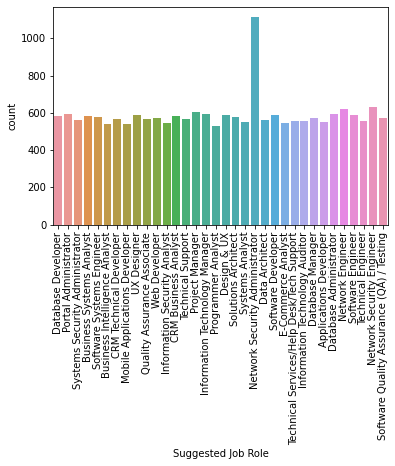

In [63]:
chart = sns.countplot(x=last1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [79]:
rest2 = SS(with_mean=False).fit_transform(rest1)
last2 = last.copy(deep=True)

rest_train, rest_test, last_train, last_test = tts(rest2, last2, test_size = 0.20)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.0325

In [82]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[445   0   0 ...   0   0   0]
 [  0 424   0 ...   0   0   0]
 [  0   0 457 ...   0   0   0]
 ...
 [  0   0   0 ... 457   0   0]
 [  0   0   0 ...   0 461   0]
 [  0   0   0 ...   0   0 465]]

Test confusion matrix
[[2 7 4 ... 3 1 3]
 [3 4 5 ... 0 4 3]
 [1 3 6 ... 3 3 2]
 ...
 [3 4 4 ... 2 3 4]
 [1 1 1 ... 5 2 5]
 [2 4 2 ... 3 1 1]]

Train classwise accuracies
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99889989 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

Test classwise accuracies
[0.01709402 0.04255319 0.05172414 0.05555556 0.04424779 0.048
 0.04166667 0.01587302 0.02586207 0.02290076 0.04166667 0.02272727
 0.03389831 0.03921569 0.02150538 0.03539823 0.06037736 0.032
 0.01801802 0.06741573 0.00671141 0.01754386 0.03125   

In [77]:
rest3 = SS(with_mean=False).fit_transform(rest1)
last3 = last.copy(deep=True)

rest_train, rest_test, last_train, last_test = tts(rest3, last3, test_size = 0.15)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.029666666666666668

In [83]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[445   0   0 ...   0   0   0]
 [  0 424   0 ...   0   0   0]
 [  0   0 457 ...   0   0   0]
 ...
 [  0   0   0 ... 457   0   0]
 [  0   0   0 ...   0 461   0]
 [  0   0   0 ...   0   0 465]]

Test confusion matrix
[[2 7 4 ... 3 1 3]
 [3 4 5 ... 0 4 3]
 [1 3 6 ... 3 3 2]
 ...
 [3 4 4 ... 2 3 4]
 [1 1 1 ... 5 2 5]
 [2 4 2 ... 3 1 1]]

Train classwise accuracies
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99889989 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

Test classwise accuracies
[0.01709402 0.04255319 0.05172414 0.05555556 0.04424779 0.048
 0.04166667 0.01587302 0.02586207 0.02290076 0.04166667 0.02272727
 0.03389831 0.03921569 0.02150538 0.03539823 0.06037736 0.032
 0.01801802 0.06741573 0.00671141 0.01754386 0.03125   

In [84]:
rest4 = SS(with_mean=False).fit_transform(rest1)
last4 = last.copy(deep=True)

rest_train, rest_test, last_train, last_test = tts(rest4, last4, test_size = 0.10)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.028

In [85]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[491   0   0 ...   0   0   0]
 [  0 485   0 ...   0   0   0]
 [  0   0 522 ...   0   0   0]
 ...
 [  0   0   0 ... 499   0   0]
 [  0   0   0 ...   0 529   0]
 [  0   0   0 ...   0   0 504]]

Test confusion matrix
[[2 0 3 ... 2 1 1]
 [0 1 1 ... 2 1 0]
 [2 2 1 ... 3 0 1]
 ...
 [5 1 1 ... 2 3 3]
 [4 3 5 ... 1 3 2]
 [4 3 1 ... 2 2 1]]

Train classwise accuracies
[0.99392713 0.99589322 0.99618321 0.99812383 0.9960396  0.99804688
 0.99439252 0.9962963  0.99808061 0.996139   0.99585921 1.
 0.99798793 0.98901099 0.99593496 0.99642218 1.         0.9964476
 0.99250936 0.99361702 0.99260628 0.99808061 1.         0.98689139
 0.99807322 0.99223301 0.99608611 0.99595142 0.99203187 0.99796748
 0.9980315  1.         0.9943609  0.9980198 ]

Test classwise accuracies
[0.03389831 0.02272727 0.02       0.01538462 0.03508772 0.08333333
 0.03703704 0.01886792 0.02739726 0.03448276 0.         0.01923077
 0.04477612 0.         0.03773585 0.01666667 0.03333333 0.03571429
 0.03125    0.

In [86]:
rest5 = pre.normalize(rest1, axis = 0)
last5 = last1.copy(deep=True)

rest_train, rest_test, last_train, last_test = tts(rest5, last5, test_size = 0.20)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.03075

In [87]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[252   1   8 ...   8   9   2]
 [  5 223   3 ...   0  10   5]
 [  5   7 203 ...   8   5   7]
 ...
 [  5   3   7 ... 235   5   4]
 [  5   3   4 ...   7 243   1]
 [  2   5  10 ...   7   4 284]]

Test confusion matrix
[[4 4 4 ... 4 1 3]
 [4 2 4 ... 4 4 2]
 [3 0 5 ... 2 1 1]
 ...
 [2 4 5 ... 5 4 1]
 [2 3 3 ... 3 3 4]
 [4 3 6 ... 3 7 4]]

Train classwise accuracies
[0.57665904 0.55061728 0.53421053 0.55       0.55864811 0.51658768
 0.55967078 0.50201613 0.56750572 0.44685039 0.46501129 0.5049505
 0.57582938 0.59502262 0.58598726 0.55156951 0.57894737 0.57630979
 0.5862069  0.52359551 0.55625    0.5754717  0.58571429 0.57773109
 0.51535836 0.57630522 0.58611111 0.55782313 0.53878407 0.61842105
 0.54562384 0.53775744 0.59852217 0.52886406]

Test classwise accuracies
[0.03278689 0.01818182 0.04464286 0.03418803 0.02702703 0.025
 0.05172414 0.02586207 0.025      0.02479339 0.04395604 0.04597701
 0.02830189 0.00862069 0.04054054 0.025      0.05319149 0.05102041
 0.00740741

In [88]:
rest6 = pre.normalize(rest1, axis = 0)
last6 = last1.copy(deep=True)

rest_train, rest_test, last_train, last_test = tts(rest6, last6, test_size = 0.10)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.0335

In [89]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[222  10   8 ...   7  10   4]
 [ 10 217   2 ...   4   8   4]
 [  4   9 242 ...   4   5   8]
 ...
 [  6   2   6 ... 276  14   4]
 [  7   5  10 ...   6 228   5]
 [  9   4  11 ...   9   7 264]]

Test confusion matrix
[[1 0 2 ... 1 1 4]
 [3 2 0 ... 0 3 2]
 [1 0 0 ... 4 2 1]
 ...
 [2 2 2 ... 1 2 1]
 [3 3 1 ... 1 3 1]
 [2 1 2 ... 2 1 2]]

Train classwise accuracies
[0.52358491 0.539801   0.52155172 0.52768166 0.49183673 0.4980695
 0.46103896 0.50081301 0.52873563 0.50326797 0.48387097 0.46781116
 0.51626016 0.5388601  0.55186722 0.49525617 0.55449483 0.54734411
 0.54809437 0.47945205 0.44677419 0.51441242 0.53307393 0.48086522
 0.54220779 0.54878049 0.54814815 0.53459119 0.49285714 0.47433628
 0.54761905 0.53179191 0.45691383 0.50867052]

Test classwise accuracies
[0.01818182 0.03508772 0.         0.03278689 0.02380952 0.
 0.03571429 0.02564103 0.04918033 0.07017544 0.03333333 0.01754386
 0.03278689 0.02941176 0.         0.         0.09271523 0.
 0.03636364 0.0625    

In [60]:
last_trans = last.copy(deep = True)

last_trans

0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

In [62]:
last_trans = last_trans.replace(['Database Manager','Project Manager','Information Technology Manager'],'Manager')
last_trans = last_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor','Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'others')
last_trans = last_trans.replace(['Software Developer','Database Developer','Mobile Applications Developer','Web Developer','CRM Technical Developer','Applications Developer'] ,'Developer')
last_trans = last_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support','Technical Support'],'Technical Support')
last_trans = last_trans.replace(['Software Engineer','Network Security Engineer','Network Engineer','Software Systems Engineer',] ,'Engineer')
last_trans = last_trans.replace(['UX Designer','Design & UX'] , 'Designer')
last_trans = last_trans.replace(['Database Administrator','Portal Administrator''Network Security Administrator','Systems Security Administrator',] , 'Administrator')
last_trans = last_trans.replace(['CRM Business Analyst','Programmer Analyst','Systems Analyst','Information Security Analyst','Business Systems Analyst','Business Intelligence Analyst',
                                 'E-Commerce Analyst'],'Analyst')
last_trans

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

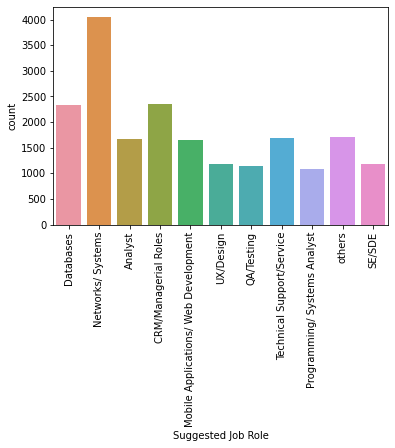

In [64]:
chart = sns.countplot(x=last_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [90]:
rest7 = SS(with_mean=False).fit_transform(rest1)

rest_train, rest_test, last_train, last_test = tts(rest7, last_trans, test_size = 0.10)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

0.1225

In [91]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[1509    0    0    0    0    0    0    0    0    0    0]
 [   0 2095    0    0    0    0    0    0    0    0    0]
 [   0    0 2122    0    0    0    0    0    0    0    0]
 [   0    0    0 1491    0    0    0    0    0    0    0]
 [   0    0    0    0 3641    0    0    0    0    0    0]
 [   0    0    0    0    0  985    0    0    0    0    0]
 [   0    0    0    0    0    0 1024    0    0    0    0]
 [   0    0    0    0    0    0    0 1049    0    0    0]
 [   0    0    0    0    0    0    0    0 1493    0    0]
 [   0    0    0    0    0    0    0    0    0 1057    0]
 [   0    0    0    0    0    0    0    0    0    0 1534]]

Test confusion matrix
[[19 16 14 11 38  7 14  6 19  9 18]
 [13 36 27 20 49 11 14 12 26 16 14]
 [21 26 26 15 49 18 13 14 31  9 14]
 [16 22 18 10 18  8 16 18 12 13 15]
 [23 51 39 41 97 21 20 27 26 31 40]
 [10 11 16 11 21  6  8 10 11  6  8]
 [19 10 17  8 21  4  3  7  8  3 11]
 [ 6 22 13  8 27  4  7  9  7  8 11]
 [13 24 21 16 29  6  4  6 2

In [92]:
rest8 = SS(with_mean=False).fit_transform(rest1)

rest_train, rest_test, last_train, last_test = tts(rest8, last_trans, test_size = 0.20)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

0.109

In [93]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[1335    0    0    0    0    0    0    0    0    0    0]
 [   0 1881    0    0    0    0    0    0    0    0    0]
 [   0    0 1849    0    0    0    0    0    0    0    0]
 [   0    0    0 1314    0    0    0    0    0    0    0]
 [   0    0    0    0 3248    0    0    0    0    0    0]
 [   0    0    0    0    0  902    0    0    0    0    0]
 [   0    0    0    0    0    0  910    0    0    0    0]
 [   0    0    0    0    0    0    0  931    0    0    0]
 [   0    0    0    0    0    0    0    0 1317    0    0]
 [   0    0    0    0    0    0    0    0    0  956    0]
 [   0    0    0    0    0    0    0    0    0    0 1357]]

Test confusion matrix
[[ 30  43  38  28  65  16  21  23  28  22  38]
 [ 50  60  69  39  88  20  32  35  49  30  34]
 [ 29  62  47  42  91  25  25  25  36  24  39]
 [ 35  40  32  24  67  14  16  17  29  14  29]
 [ 71  89 106  71 172  44  59  54  68  50  72]
 [ 11  23  34  14  47  10  16   9  20  13  15]
 [ 19  22  27  15  42   6  12  14

In [94]:
rest9 = SS(with_mean=False).fit_transform(rest1)

rest_train, rest_test, last_train, last_test = tts(rest9, last_trans, test_size = 0.15)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

0.11566666666666667

In [95]:
cls_train = con_mat(cls.predict(rest_train),last_train)
cls_test = con_mat(cls.predict(rest_test),last_test)
print("Train confusion matrix")
print(cls_train)
print("\nTest confusion matrix")
print(cls_test)
print("\nTrain classwise accuracies")
print(cls_train.diagonal()/cls_train.sum(axis=1))
print("\nTest classwise accuracies")
print(cls_test.diagonal()/cls_test.sum(axis=1))

Train confusion matrix
[[1414    0    0    0    0    0    0    0    0    0    0]
 [   0 1993    0    0    0    0    0    0    0    0    0]
 [   0    0 1963    0    0    0    0    0    0    0    0]
 [   0    0    0 1418    0    0    0    0    0    0    0]
 [   0    0    0    0 3458    0    0    0    0    0    0]
 [   0    0    0    0    0  911    0    0    0    0    0]
 [   0    0    0    0    0    0  961    0    0    0    0]
 [   0    0    0    0    0    0    0  996    0    0    0]
 [   0    0    0    0    0    0    0    0 1439    0    0]
 [   0    0    0    0    0    0    0    0    0 1017    0]
 [   0    0    0    0    0    0    0    0    0    0 1430]]

Test confusion matrix
[[ 27  29  34  28  36  17  11  17  23  15  25]
 [ 26  42  32  23  65  17  25  26  30  15  43]
 [ 35  44  46  31  77  14  20  19  30  24  23]
 [ 21  32  25  27  60  13  11  31  29  13  14]
 [ 55  73  85  44 125  30  43  28  30  36  63]
 [ 11  20  16  12  33  10  15  10  11   7  12]
 [ 12  14  29   8  33  11   4   5

In [96]:
rest10 = pre.normalize(rest1, axis = 0)

rest_train, rest_test, last_train, last_test = tts(rest10, last_trans, test_size = 0.10)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.1455

In [97]:
rest11 = pre.normalize(rest1, axis = 0)

rest_train, rest_test, last_train, last_test = tts(rest11, last_trans, test_size = 0.15)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.13833333333333334

In [98]:
rest12 = pre.normalize(rest1, axis = 0)

rest_train, rest_test, last_train, last_test = tts(rest12, last_trans, test_size = 0.20)

tmp = mlpc(random_state = 40)

cls = tmp.fit(rest_train, last_train) 

acs(cls.predict(rest_test), last_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.144